While browsing around for inspiration, I found this wonderful post by someone named `SonyMonthonaRK` on Medium; the post is [here](https://medium.com/@sonymonthonark/simple-analysis-using-python-9c452d9a8c0) since it contains more than what I'll be talking about. The graph is simple aside from the red highlighted box around relevant information: seen below:
![](https://miro.medium.com/max/720/1*02yZPwE-qDMAL9w94piKIA.png)

I've seen this effect before but never actually seen the code for it. Thankfully, he provided the a link to it on their [Github page](https://medium.com/@sonymonthonark/simple-analysis-using-python-9c452d9a8c0) since I wanted to learn this trick. The Good news is that the effect is not complicated; the bad news is that it's implementation here is conditional and ugly. We're going to copy it here just for reference:
```python
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.lineplot(x='month', y='average_num_booking', hue='hotel_type', color= 'gray',
             size="hotel_type", sizes=(2.5, 2.5), data=df1_gr) # plot awal menggunakan lineplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Arrival Month', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Average Number of Booking', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 4800) # membatasi y axis

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='grey', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='magenta') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='grey', alpha=0.3) # memberikan blok warna pada

plt.text(x=-0.5, y=5200, s="Both Hotels Have More Guests During Holiday Season", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=4850, s="City Hotel has the decreased guests in August and September, while both hotels have less \ncustomer during not holiday season (Jan-Mar)", 
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
```

This is a lot of - specialized and inflexible - code to add an affect to a graph. If I wanted to add this to my own graphs then I would have to do quite a bit of work and math and customization. I want this on any graph at any point without doing all this work. So, let us take it apart and make a function we can all use. We're not going to use their data since we want to apply it to any random set of data so we're using random data.

In [1]:
#| include: false
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# our pretend dataset
data = np.random.randn(50)
data = pd.DataFrame(data, columns=['Random'])

Much of that is boilerplate and repetition so the summary of a single application would be:
```python
# Initialize the lineplot

# Add the left dotted line

# Add the right dotted line.

# Add the notated text

# Add a stackplot to fill the space between the lines
```

We'll cover the plot first since it's the easiest and can go outside of the function we're trying to build. We'll use the *seaborn* `lineplot` the same. We'll need use an index similar to the example post while we build this - so a simple range:
```python
p = sns.lineplot(x=range(0, len(data)), y="Random", data=data)
```

We'll want to save the graph reference as we'll need it for later.

Looking at the docs for the horizintal line function, we need:
1. The x tick value.
2. The line display type.
3. The color

We're going to also modify the line width in our example and fix it; you are welcome to modify this function to accept a thicker value but I like it at 1 and have no current reason to change it. We will need the left and right line points passed to the function as a starting point; we'll hold the other values constant for now.

Text(0.5, 1.0, 'Working Through Example')

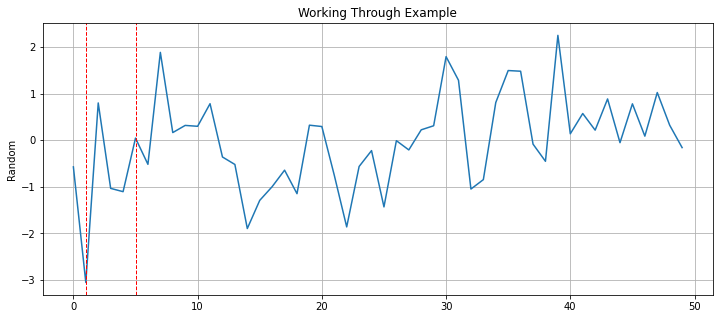

In [3]:
def building(p = None, xCoord = None):
    # Add the lines:
    plt.axvline(xCoord[0], ls='--', lw=1, color='red')
    plt.axvline(xCoord[1], ls='--', lw=1, color='red')    


plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(0, len(data)), y="Random", data=data)
plt.grid()
building(p, (1,5))
plt.title("Working Through Example")

Good start. The next problem will be adding the text inside the box and how to position the text automatically. We could brute force - and in some instances we might have no other choice - but that is not convenient while we're automating the function. How I solved this is to think about what we're doing in mathematical terms.
1. Find the center of the `x values` range.
2. Translate the text to the left based off the figure size and the length of the text.

So, first we find the middle point by taking the difference of both sides, dividing it by two and then adding that to the left side.

Text(0.5, 1.0, 'Working Through Example')

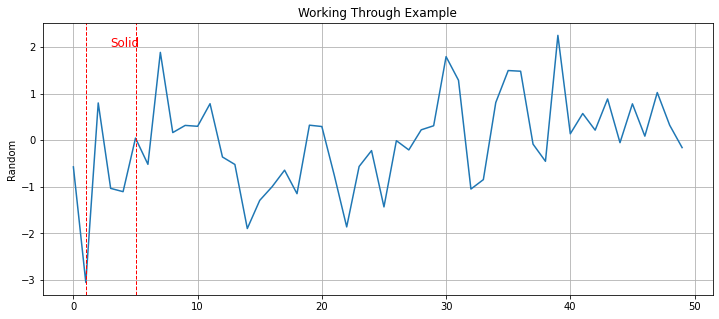

In [4]:
def building(p = None, xCoord = None, text=None, xText=None):
    # Add the lines:
    plt.axvline(xCoord[0], ls='--', lw=1, color='red')
    plt.axvline(xCoord[1], ls='--', lw=1, color='red')

    # Ignore this for now; we simply need it
    y_min, y_max = p.get_ylim()
    yPos = y_max*.8

    xText = xCoord[0] + (xCoord[1] - xCoord[0])/2
    plt.text(x=xText, y=yPos, s=text, fontsize=12, color='red')    


plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(0, len(data)), y="Random", data=data)
plt.grid()
building(p, (1,5), "Solid")
plt.title("Working Through Example")

Next, we'll need to get the figure size as well as the length of the text. Thankfully, `matplotlib` allows you to get the dimensions of the figure using `.figure.get_size_inches()`. 

Text(0.5, 1.0, 'Working Through Example')

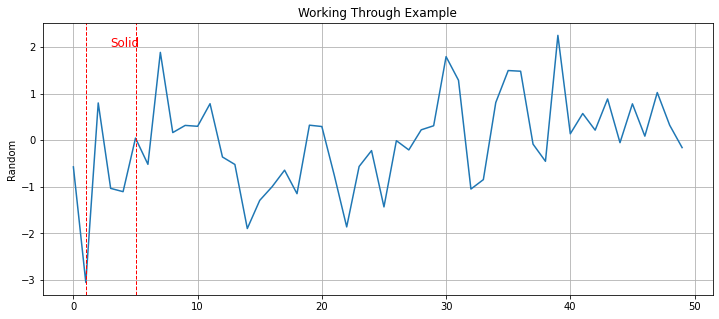

In [5]:
def building(p = None, xCoord = None, text=None, xText=None):
    # Add the lines:
    plt.axvline(xCoord[0], ls='--', lw=1, color='red')
    plt.axvline(xCoord[1], ls='--', lw=1, color='red')

    # Ignore this for now; we simply need it
    y_min, y_max = p.get_ylim()
    yPos = y_max*.8

    width, _ = p.figure.get_size_inches()
    lenText = len(text)
    
    xText = xCoord[0] + (xCoord[1] - xCoord[0])/2
    plt.text(x=xText, y=yPos, s=text, fontsize=12, color='red')    


plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(0, len(data)), y="Random", data=data)
plt.grid()
building(p, (1,5), "Solid")
plt.title("Working Through Example")

Now that we have these values, we can think about how to move them. The answer is this formula: `lenText * 3/width`. 

Text(0.5, 1.0, 'Working Through Example')

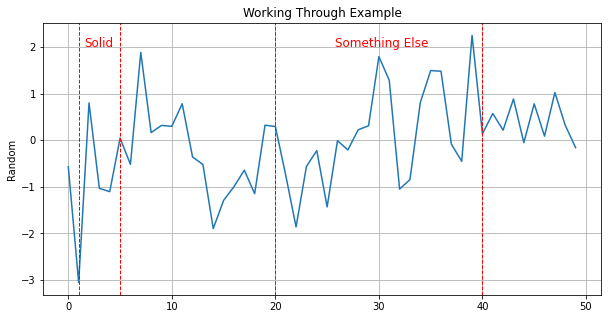

In [6]:
def building(p = None, xCoord = None, text=None, xText=None):
    # Add the lines:
    plt.axvline(xCoord[0], ls='--', lw=1, color='red')
    plt.axvline(xCoord[1], ls='--', lw=1, color='red')

    # Ignore this for now; we simply need it
    y_min, y_max = p.get_ylim()
    yPos = y_max*.8

    width, _ = p.figure.get_size_inches()
    lenText = len(text)

    xText = xCoord[0]  + (xCoord[1] - xCoord[0])/2 - 3 * lenText/width
    plt.text(x=xText, y=yPos, s=text, fontsize=12, color='red')    


plt.figure(figsize=(10,5))
p = sns.lineplot(x=range(0, len(data)), y="Random", data=data)
plt.grid()
building(p, (1,5), "Solid")

# Showing you can simply run this more than once
# to add another box highlight
building(p, (20,40), "Something Else")
plt.title("Working Through Example")

So, why does this work? Frankily, I'm not sure quite sure where the three comes from here. Normalizing the number of characters by the figures width make sense but that alone is not enough; you can see this in the below example.

Text(0.5, 1.0, 'Working Through Example')

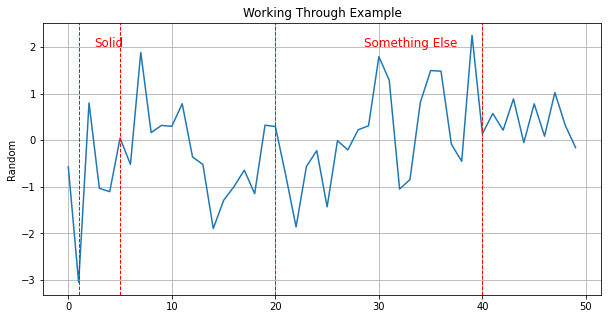

In [7]:
def building(p = None, xCoord = None, text=None, xText=None):
    # Add the lines:
    plt.axvline(xCoord[0], ls='--', lw=1, color='red')
    plt.axvline(xCoord[1], ls='--', lw=1, color='red')

    # Ignore this for now; we simply need it
    y_min, y_max = p.get_ylim()
    yPos = y_max*.8

    width, _ = p.figure.get_size_inches()
    lenText = len(text)

    xText = xCoord[0]  + (xCoord[1] - xCoord[0])/2 - lenText/width
    plt.text(x=xText, y=yPos, s=text, fontsize=12, color='red')    


plt.figure(figsize=(10,5))
p = sns.lineplot(x=range(0, len(data)), y="Random", data=data)
plt.grid()
building(p, (1,5), "Solid")

# Showing you can simply run this more than once
# to add another box highlight
building(p, (20,40), "Something Else")
plt.title("Working Through Example")

Anyways, we'll leave what works for now and move to the last problem which is much easier to solve: the `stackplot`. If you're not familiar with these graphs then it's more than likely you're unfamiliar with the name and not the plot itself. These are used to show percentage change of different categories - usually over time. A good example would be the follow image from the website [Geeksforgeeks](https://www.geeksforgeeks.org/matplotlib-pyplot-stackplot-in-python/):
![](https://media.geeksforgeeks.org/wp-content/uploads/20200331094634/Figure_17.png)

Except what we want is one box full of a single color: `grey`. Maybe there is a better way to do this but we're going to base our work off the post and it will work anyways. For a `stackplot` we need:
1. The coordinates to fill.
2. The values.

In the example, the height is filled with a known value: `4800`. But this value is the distance from the x-axis and we cannot use this in our example - nor will this generalize. Since their data does not have negative values this works fine but sometimes we *will* have negative values. What we will need to do is find a fill value. We *could* use the figure height but there is a case where the total distance can be greater than the figure height strangely enough. What we'll do is take the sum of the absolute values of the `y_min` and `y_max` values + `1`. Then, if that values is larger than the height we'll use that instead.

In [8]:
def building(p = None, xCoord = None, text=None, xText=None):

    # Ignore this for now; we simply need it
    y_min, y_max = p.get_ylim()
    p.set_ylim(y_min, y_max)

    yPos = y_max*.8

    # Collecting height here:
    width, height = p.figure.get_size_inches()
    totalDist = abs(y_min) + abs(y_max) + 1
    stackFill = height

    if totalDist > height:
        stackFill = totalDist

    lenText = len(text)
    xText = xCoord[0]  + (xCoord[1] - xCoord[0])/2 - 3 * lenText/width

    # Add the lines:
    plt.axvline(xCoord[0], ls='--', lw=1, color='red')
    plt.axvline(xCoord[1], ls='--', lw=1, color='red')

    plt.text(x=xText, y=yPos, s=text, fontsize=12, color='red')   
    plt.stackplot(np.arange(xCoord[0],xCoord[1]+1,1), [[stackFill]], baseline = "sym", color='grey', alpha=0.3) 

Text(0.5, 1.0, 'Working Through Example')

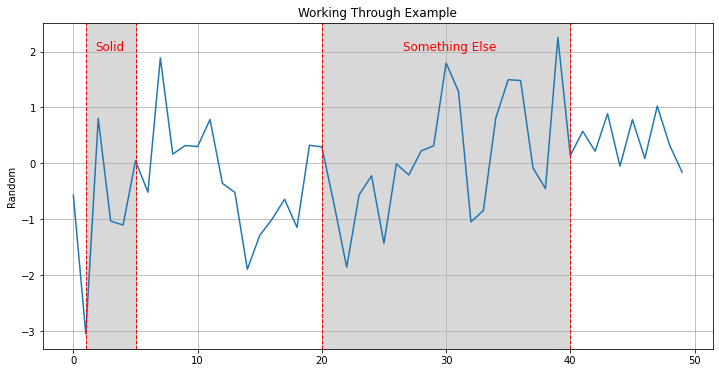

In [16]:
plt.figure(figsize=(12,6))
p = sns.lineplot(x=range(0, len(data)), y="Random", data=data)
plt.grid()
building(p, (1,5), "Solid")

# Showing you can simply run this more than once
# to add another box highlight
#
building(p, (20,40), "Something Else")
plt.title("Working Through Example")

You may be asking what the `baseline="sym"` argument is since it's not very descriptive. All that does is changes the relationship from `0` start to `Symmetric around the x-axis` which we needed for negative values. And, speaking let us test that we can filter for positive values and this all still works.

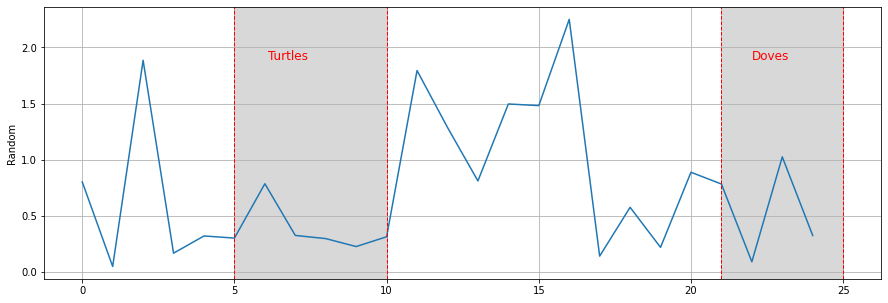

In [12]:
tmp = data.query("Random >= 0")

plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(0, len(tmp)), y="Random", data=tmp)
plt.grid()
building(p, (5, 10), "Turtles")
building(p, (21, 25), "Doves")

Excellent. The Doves to my eyes looks a little off center but that should be good enough. Just add a little bit of error handling and we've got a generalized highlight box function!

In [14]:
def addDotBox(p = None, xCoord = None, text=None, xText=None, yText=None, fSize = 12):
    if not p:
        raise ValueError("Plot cannot be None Type.")
    if not text:
        raise ValueError("text cannot be left blank.")
    
    # Pull/reset the limits:
    y_min, y_max = p.get_ylim()
    p.set_ylim(y_min, y_max)

    # get 
    width, height = p.figure.get_size_inches()
    totalDist = abs(y_min) + abs(y_max) + 1
    stackFill = height

    if totalDist > height:
        stackFill = totalDist
    lenText = len(text)

    if not xCoord:
        raise ValueError("Missing xCoord argument.")
    if len(xCoord) != 2:
        raise ValueError("There must be two values for xCoord")
    if not xText:
        xText = xCoord[0]  + (xCoord[1] - xCoord[0])/2 - 3 * lenText/width
    if not yText:
        yText = y_max * .8
    
    plt.axvline(xCoord[0], ls='--', lw=1, color='red')
    plt.axvline(xCoord[1], ls='--', lw=1, color='red')
    plt.text(x=xText, y=y_max*.8 , s=text, fontsize=fSize, color='red')
    plt.stackplot(np.arange(xCoord[0],xCoord[1]+1,1), [[stackFill]], baseline = "sym", color='grey', alpha=0.3)